# Exporatory Data Analysis

## Introduction and previous steps

In the previous steps, in Data Wrangling, we cleaned the original dataset both in terms of rows (residences) and columns (residences features). In particular, we started with a global Airnbnb residences dataset, with around 500k residences, and filtered it to around 233k residences, all in the european region.

The final dataset generated "dataset_final" included information about 15 cities in the Europe region.

Besides this work, we researched and gathered several features for these 15 cities. The features selected for the recommender system included different spectrums of a city and its society, such as its culture, pollution, local purchasing power, population or city amenities, between others.

At this stage, we have cleaned dataframes and we will focus on extracting useful insights both from residences and their cities, aiming at understanding better what features in residences and cities can be used in the later stages of the data science pipeline.

## Scope of the analysis

Before starting with the EDA analysis, we would like to define what is it that we are looking for:

* **In relation with the hosts and residences:**

It would be interesting to explore some topics such as:
* What are the most common types of residenes? Is there a significant difference in the number of rooms, bedrooms and accommodates?
* What is the price distribution like in each city? Are there cities with higher prices than others?
* Are there cities with better ratings than others?

*All these questions could be useful to identify similar cities in terms of residences, aiming at pairing future hosts between eachother from the perspective of their residences characteristics (price, ratings, number of beds, bedrooms or accommodates*

* **In relation with the cities:**

It would be interesting to explore some topics such as:

* Is there significant economic differences between cities in terms of purchasing power and cost of living?
* Are there significant differences between cities in terms of pollution?
* Are there significant differences betwween citiesin terms of the amenities they provide?
* Are there significant differences between cities in terms of the population number and distribution of age groups and sex?

*All these similarities and differences could be useful to identify similar cities, aiming at pairing hosts between eachother based on how similar their cities are from different perspectives, such as cost of living, amenities, social culture, etc.*

## Result of the ananlysis

As a result of the work performed, we expect to have a better understanding of what cities are similar or different in terms of city features, and what cities are similar or different in terms of residences prices and characteristics.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load files

There is one dataset with residences information and several datasets with city features:

In [2]:
#dataframe with residences and feature/host residences
df = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\dataset_final.csv')
#dataframes with cities features
economy = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\economic.csv')
crime = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\crime.csv')
amenities = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\amenities.csv')
hostility = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\hostility.csv')
pollution = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\pollution.csv')
pop_fem = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\population female.csv')
pop_male = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\population male.csv')
pop = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\population.csv')
rat_fem = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\ratio female.csv')
rat_male = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Airbnb Recommender System - Capstone Project\Notebooks\Data\residences\ratio male.csv')

# Cities analysis

In the following lines, we will visualize city features from different perspectives or "spectrums" to understand how different or similar they are.

## Economic spectrum

* **Cost of Living Index (Excl. Rent)** is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. *If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than the average of the 15 cities (excluding rent).*

* **Rent Index** is an estimation of prices of renting apartments in the city compared to the average of the 15 cities. *If Rent index is 80, Numbeo has estimated that price of rents in that city is on average 20% less than the average price of the 15 cities.*

* **Groceries Index** is an estimation of grocery prices in the city compared to the average price of the 15 cities. To calculate this section, Numbeo uses weights of items in the "Markets" section for each city.

* **Restaurants Index** is a comparison of prices of meals and drinks in restaurants and bars compared to the average of the 15 cities.

* **Cost of Living Plus Rent Index** is an estimation of consumer goods prices including rent comparing to the average of the 15 cities.

* **Local Purchasing Power** shows relative purchasing power in buying goods and services in a given city for the average net salary in that city. *If domestic purchasing power is 40, this means that the inhabitants of that city with an average salary can afford to buy on an average 60% less goods and services than the average of the 15 cities resident with an average salary.*

In [3]:
economy.head(15)

,Unnamed: 0,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,0,Vienna,87.88,76.90,84.28,90.99,81.36,114.38
1,1,Brussels,96.75,76.97,90.27,97.28,100.70,109.65
2,2,Antwerp,96.20,61.54,84.85,95.43,107.67,104.97
3,3,Copenhagen,120.53,122.39,121.14,112.59,134.21,105.80
4,4,Paris,114.86,117.31,115.66,133.63,104.42,93.94
5,5,Berlin,88.13,81.24,85.87,85.52,74.32,115.97
6,6,Athens,73.69,36.89,61.65,69.35,69.71,55.37
7,7,Dublin,104.96,149.45,119.53,101.10,105.25,93.10
8,8,Rome,96.41,82.45,91.84,98.80,92.66,65.66
9,9,Amsterdam,103.28,134.05,113.35,90.99,108.83,107.41


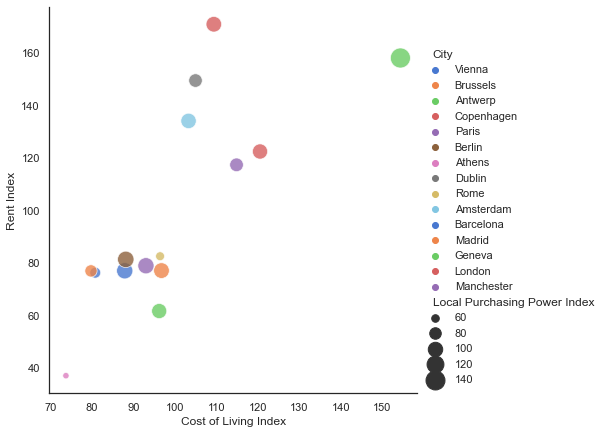

In [4]:
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Cost of Living Index", y="Rent Index",
            hue="City", size="Local Purchasing Power Index",
            sizes=(40, 400), alpha=.8, palette="muted",
            height=6, data=economy)

### What is the cost of living and rent like in cities? Are residents of cities with high cost of living and rent also having strong purchasing power, and viceversa?

* Cost of living of 100 is the average cost of living of the 15 cities, *higher than 100 means that the cost of living in that city is higher than average, and viceversa.*
* Rent Index is the cost of rent, 100 is the average of the 15 cities, *higher than 100 means that the rent in that city is more expensive than on average, and viceversa.*
* Local Purchasing Power Index indicates how many more or less goods and services the resident could buy abroad with their local salary in the "average" city. 100 is the average of the 15 cities, *higher than 100 means that, on average, residents can buy more goods and services abroad than locally, and viceversa.*

Regarding **Cost of Living**, we can categorize the cities as follows:
- Cities with **significantly higher cost of living** than average: Geneva, Copenhagen and Paris.
- Cities with **moderately higher cost of living** than average: Amsterdam, Dublin and London.
- Cities with **moderately lower cost of living** than average: Vienna, Brussels, Manchester, Rome, Antwerp and Berlin.
- Cities with **significantly lower cost of living** than average: Athens, Madrid and Barcelona.

Regarding **Rent Index**, we can categorize the cities as follows:
- Cities with **significantly higher rent cost** than average: London, Dublin, Geneva and Amsterdam.
- Cities with **moderately higher rent cost** than average Cities with significantly higher Rent Index than average: Copenhagen and Paris.
- Cities with **moderately lower rent cost** than average: Madrid, Barcelona, Vienna, Brussels, Manchester, Rome, Dublin and Berlin.
- Cities with **significantly lower rent cost** than average: Antwerp and Athens.

Adding the relative **Local Purchasing Power** to the analysis, we can categorize the cities as follows:
- Cities with **strong purchase power**-**high cost** of living and rent: *Geneva.*
- Cities with **moderate purchasing power**-**high cost** of living and rent: *London, Dublin, Amsterdam, Copenhagen and Paris.*
- Cities with **moderate purchasing power**-**moderate cost** of living and rent: *Brussels and Antwerpen.*
- Cities with **moderate purchasing power**-**low cost** of living and rent: *Manchester, Berlin and Vienna*
- Cities with **low purchasing power**-**moderate cost** of living and rent: *Rome.*
- Cities with **low purchasing power**-**low cost** of living and rent: *Madrid, Barcelona.*
- Cities with **very low purchasing power**-**very low cost** of living and rent: *Athens*.

**Summary**:

There are clearly at least 2 clusters of cities in terms of Cost of Living and Rent, some cities have salaries with strong purchasing power abroad, but also high cost of living and Rent Index, and others have weaker salaries and lower cost of living and Rent Index.

There are two exceptional cases where cities have salaries with strong purchasing power abroad, but lower cost of living and rent (e.g. Belin, Manchester and Vienna) and others with weaker salaries but very high cost of living and rent in comparison (e.g. Paris, Dublin and Rome).

### What is the restaurant and groceries cost like in cities? Are there cities in which it is very expensive to go to a restaurant rather than to eat in your house? What cities are the best to go out for restaurants or do the groceries?

In relation with the **Restaurants and Bars** costs:
* **Expensive cities**: Geneva and Copenhagen.
* **Moderately expensive**: London, Amsterdam, Antwerp, Dublin, Paris, Manchester.
* **Average**: Brussels.
* **Moderately cheap**: Rome.
* **Cheap**: Athens, Vienna, Madrid, Berlin and Barcelona.

In relation with the **Groceries** costs:
* **Expensive cities**: Geneva and Paris
* **Moderately expensive**: Copenhagen
* **Average**: Dublin, Rome, Brussels, London and Antwerp.
* **Moderately cheap**: Amsterdam, Manchester, Vienna and Berlin.
* **Cheap**: Athens, Madrid and Barcelona.

Adding the **purchasing power** factor into the analysis, we can observe how Rome has low purchasing power but average cost of groceries or how Berlin and Vienna have high purchasing power but low cost of groceries and restaurants.

**Summary**

The cost of groceries and restaurants is very different from city to city, there is a cluster of cities with average cost of groceries and moderately high cost of restaurants and other with low cost of groceries and restaurants. In relation with high cost of groceries and restaurants there are no visible clusters.

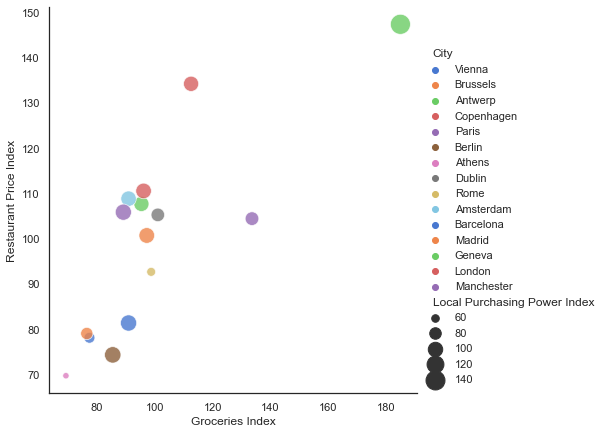

In [5]:
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Groceries Index", y="Restaurant Price Index",
            hue="City", size="Local Purchasing Power Index",
            sizes=(40, 400), alpha=.8, palette="muted",
            height=6, data=economy)

### What is the purchasing power abroad and total cost of living (cost of life+rent) like in cities? Are residents of expensive cities having all higher purchasing power, and viceversa?

**High Salary and high cost:** At the top right corner, cities with stronger than average salaries in terms of purchasing power abroad, and higher than average cost of living: **Geneva, Copenhagen, Amsterdam and London**.

**High salary and low cost:** At the bottom right corner, cities with stronger than average salaries in terms of purchasing power abroad, and lower than average cost of living plus rent: **Brussels, Antwerp, Manchester, Berlin and Vienna**.

**Low salary and low cost:** At the bottom left corner, cities with weaker than average salaries in terms of purchasing power abroad, and lower than average cost of living plus rent: **Athens, Rome, Madrid and Barcelona**.

**Low salary and high cost:** At the top left corner, cities with weaker than average salaries in terms of purchasing power abroad, and higher than average cost of living plus rent: **Dublin and Paris**.

Text(0.5, 1.0, 'Cost of Living vs. Local Purchasing Power')

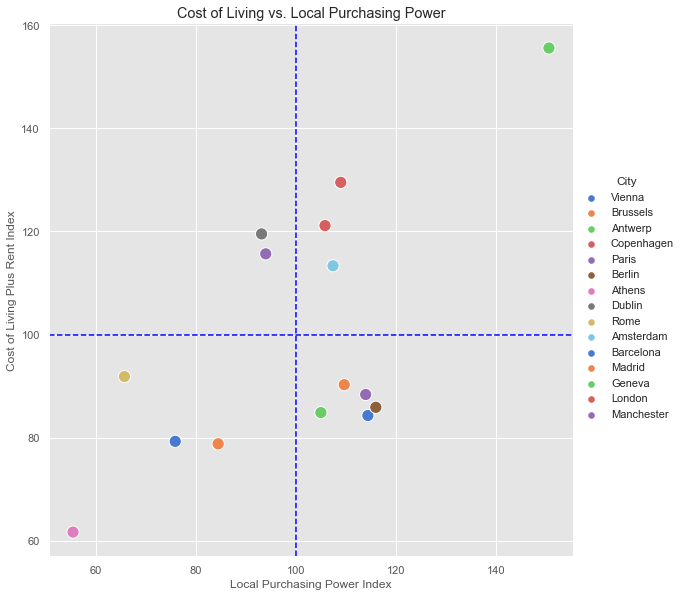

In [64]:
sns.set_theme(style="white")
# Load the example mpg dataset
sns.set(rc={'figure.figsize':(18,8)})
plt.style.use('ggplot')
# Plot miles per gallon against horsepower with other semantics
g = sns.relplot(x="Local Purchasing Power Index", y="Cost of Living Plus Rent Index",
            hue="City",sizes=(400), palette="muted",
            height=8, data=economy,s=150)
plt.axhline(100, ls='--', color='blue')
plt.axvline(100, ls='--', color='blue')
plt.title('Cost of Living vs. Local Purchasing Power')

## Amenities

### According to locals, what's the satisfaction regarding the amenities of their cities?


In [7]:
amenities.head(15)

,Unnamed: 0,City,norm_score_pub_transport,norm_score_green_places,norm_score_sports,norm_score_cultural,norm_score_public_spaces
0,0,Brussels,0.583663,0.811268,0.707202,0.537342,0.736297
1,1,Antwerp,0.602647,0.856023,1.000000,0.749101,0.918953
2,2,Copenhagen,0.732794,0.970956,0.744960,0.796250,0.924146
3,3,Berlin,0.821741,0.867674,0.603141,0.731351,0.767469
4,4,Dublin,0.652075,0.919839,0.831729,0.648258,0.751763
5,5,Athens,0.617834,0.000000,0.000000,0.000000,0.000000
6,6,Madrid,0.640497,0.577407,0.368567,0.041491,0.633710
7,7,Barcelona,0.638781,0.601704,0.621173,0.318039,0.797199
8,8,Paris,0.635313,0.809445,0.546269,0.651631,0.790451
9,9,Rome,0.000000,0.444615,0.416513,0.103151,0.333259


### How satisfied are locals with their cities public spaces and green places?

Public spaces amenities (streets, plazas, ..) and green places amenities (parks, green areas) are normalized scores based on surveys made to locals. The higher the value (max 1) the more satisfied they are and the lower the number (min 0) the less satisfied they are.

Most cities have high satisfaction in both amenities. Execptionally, Athens is scoring very low. Rome is scoring also low on both.

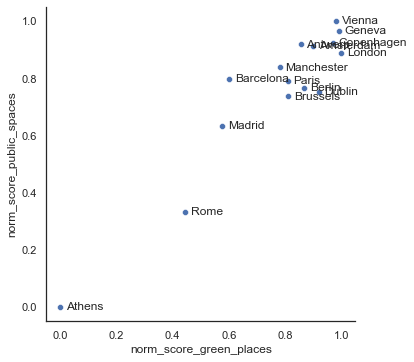

In [8]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="norm_score_green_places", y="norm_score_public_spaces", data=amenities)
ax = p1.axes[0,0]
for idx,row in amenities.iterrows():
    x = row[3]
    y = row[6]
    text = row[1]
    ax.text(x+.02,y-.01,text, horizontalalignment='left')

### How satisfied are locals with their cities public transport and cultural amenties?

Public transport amenities (bus, train) and cultural amenities (museums, theaters) are normalized scores based on surveys made to locals. The higher the value (max 1) the more satisfied they are and the lower the number (min 0) the less satisfied they are.

Some cities are very satisifed with Public transport and cultural amenities, such as Vienna and Amsterda. Rome locals are not satisified with their cultural or public transport amenities and Athens, Madrid and Barcelona are not satisfied with their cultural amenities but are moderately satisfied with the public transport.

Text(0.5, 1.0, 'Satisfaction with cultural amenities vs. public transport')

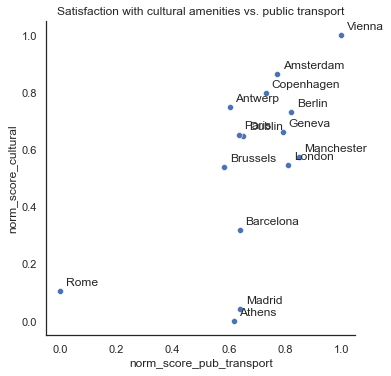

In [74]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="norm_score_pub_transport", y="norm_score_cultural", data=amenities)
ax = p1.axes[0,0]
for idx,row in amenities.iterrows():
    x = row[2]
    y = row[5]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')
plt.title('Satisfaction with cultural amenities vs. public transport')

### How satisfied are locals with their cities sport amenities and green areas?

Sport amenities (bus, train) and green areas (parks and green areas) are normalized scores based on surveys made to locals. The higher the value (max 1) the more satisfied they are and the lower the number (min 0) the less satisfied they are.

Some cities are very satisifed their sports amenities, such as Geneva and Antwerpen, while others are very disatisfied, such as Athens, madrid and Rome.

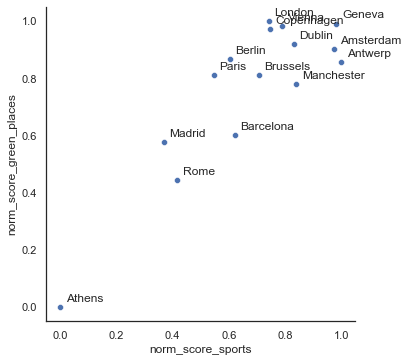

In [10]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="norm_score_sports", y="norm_score_green_places", data=amenities)
ax = p1.axes[0,0]
for idx,row in amenities.iterrows():
    x = row[4]
    y = row[3]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')

### Summary

There are differences between cities in terms of their amenities, although they are somehow clustered at the top end of the normalized score. This is, that there is a significant number of cities with general good scores on every aspect of the perception survery, while others score very low on several aspects of the perception survey.

Athens, Madrid and Rome are cities in which there is a general dissatisfaction with the amenities. On the opposite, Vienna, Geneva and Amsterdam score high in general.

## Social Spectrum

The social spectrum measures the likelihood, according to locals perception, of how good or bad their city is to live in, for different individuals, depending on their age, sexual identity, raze or familiar situation.

The values are normalized 0-1, meaning that values close to 1 represent that that invidiual is very likely going to live well in that city and 0 very unlikely.

In [11]:
hostility.head(15)

,Unnamed: 0,City,score_norm_general,score_norm_ethnic,score_norm_gay,score_norm_immigrants,score_norm_young_families,score_norm_elderly
0,0,Brussels,0.725835,0.545045,0.061683,0.534006,0.434955,0.633666
1,1,Antwerp,0.967707,0.482883,0.822269,0.862052,0.439450,0.701256
2,2,Copenhagen,0.854130,0.625225,0.976477,0.653689,0.970122,0.803943
3,3,Berlin,0.905536,0.648348,0.795609,0.763278,0.652565,0.654246
4,4,Dublin,0.938489,0.971171,0.912703,0.977169,0.585933,0.734185
5,5,Athens,0.042619,0.273874,0.275484,0.360250,0.000000,0.042678
6,6,Madrid,0.884007,0.881982,0.872974,0.977650,0.760973,0.824523
7,7,Barcelona,0.827768,0.712012,0.860429,0.971161,0.948440,0.972704
8,8,Paris,0.657293,0.836637,0.247778,0.266282,0.432047,0.455373
9,9,Rome,0.000000,0.000000,0.000000,0.000000,0.166843,0.000000


### For young families with children and elderly people

For eldery people Vienna, Barcelona and Manchester are the best cities, and Athens and Rome the worst cities. For young families with children, Geneva, Copenhaguen, Barcelona and Manchester and the best cities to live and Athens Rome and Amsterdam the worst.

There is a cluster of moderate cities both for elderly and young families with children (Dublin, Berlin and London).

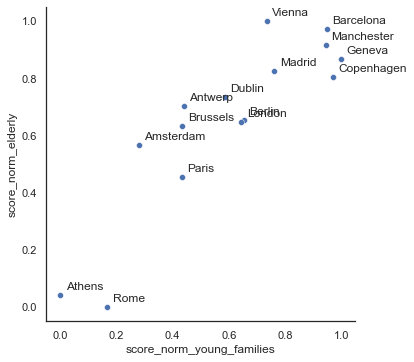

In [12]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="score_norm_young_families", y="score_norm_elderly", data=hostility)
ax = p1.axes[0,0]
for idx,row in hostility.iterrows():
    x = row[6]
    y = row[7]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')

### For immigrants and ethnic minorities

For immigrants, Manchester, Dublin and Barcelona are the best cities to live in, and the worst cities Paris, Rome  and Athens. For ethnic minorities, the best cities to live in are Manchester, Dublin and Amsterdam and the worst cities are Rome, Athens, Vienna and Antwerp.

There is a cluster of moderate cities both for immigrants and ethnic minorities (Berlin, Copenhaguen, Brussels).

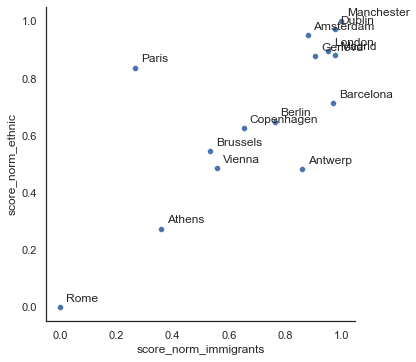

In [13]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="score_norm_immigrants", y="score_norm_ethnic", data=hostility)
ax = p1.axes[0,0]
for idx,row in hostility.iterrows():
    x = row[5]
    y = row[3]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')

### For general population and gay/lesbian population

For general population, best cities to live in are Manchester, Geneva and Antwerp, and worst cities are Rome and Athens. For gay/lesbian population best cities to live in are Geneva, Copenhaguen and Manchester and the worst cities Rome, Brussels, Paris and Athens.

There is a cluster of good cities for both general population and gay/lesbian population including many cities.

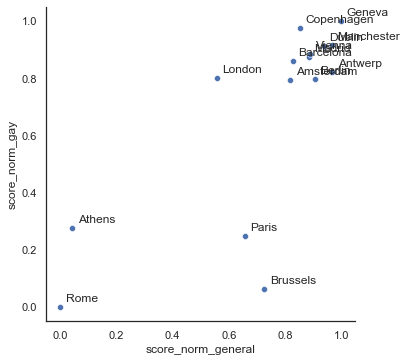

In [14]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="score_norm_general", y="score_norm_gay", data=hostility)
ax = p1.axes[0,0]
for idx,row in hostility.iterrows():
    x = row[2]
    y = row[4]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')

## Pollution Spectrum

How is the pollution in different cities? Is there singificant difference between air pollution and noise pollution? Are some cities more clean than others?

The pollution spectrum measures the satisfaction, according to locals perception, of how good or bad their city air and noise levels are, as well as the overall cleanliness levels of the city.

The values are normalized 0-1, meaning that values close to 1 represent that that invidiual is very likely going to live well in that city and 0 very unlikely.

In [15]:
pollution.head(15)

,Unnamed: 0,City,air_score_norm,noise_score_norm,clean_score_norm,Pollution Index,Exp Pollution Index
0,0,Brussels,0.388329,0.408581,0.422918,62.13,110.17
1,1,Antwerp,0.594383,0.774693,0.836928,61.14,110.83
2,2,Copenhagen,0.712932,0.726070,0.801142,21.06,33.38
3,3,Berlin,0.726065,0.549622,0.523524,39.41,65.98
4,4,Dublin,0.963148,1.000000,0.678932,39.88,66.51
5,5,Athens,0.000000,0.000000,0.258747,57.28,104.45
6,6,Madrid,0.098910,0.291407,0.374470,52.92,101.61
7,7,Barcelona,0.189190,0.243203,0.637792,64.80,113.21
8,8,Paris,0.066501,0.359555,0.435047,64.54,115.02
9,9,Rome,0.114151,0.287717,0.000000,66.63,124.02


### Air pollution vs. Noise pollution
In terms of air pollution, the most polluted cities are Athens, Paris, Madrid, Barcelona and Rome. The less polluted cities are Dublin, Vienna and Manchester. This is the same for noise pollution.

There is a cluster of moderately polluted cities in terms of noise levels and air pollution.

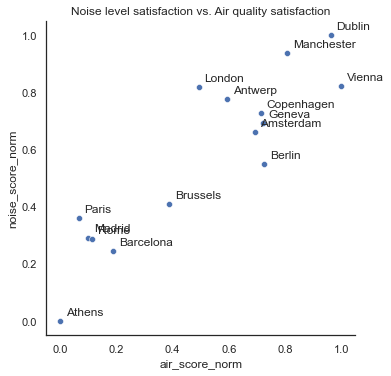

In [73]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="air_score_norm", y="noise_score_norm", data=pollution)
ax = p1.axes[0,0]
for idx,row in pollution.iterrows():
    x = row[2]
    y = row[3]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')
plt.title('Noise level satisfaction vs. Air quality satisfaction')
plt.show()

### Air pollution vs. Cleanliness

The cleanest cities are Vienna, Geneva, Antwerpen and Copenhagen. The least clean cities are Rome, Athens, Madrid, Paris and Brussels.

There is a cluster of moderately high clean cities.

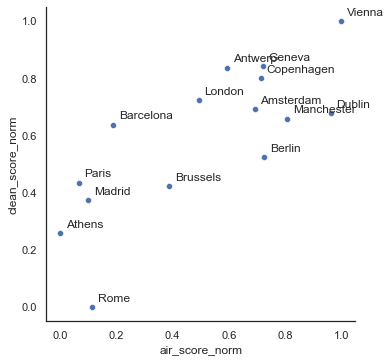

In [17]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
p1 = sns.relplot(x="air_score_norm", y="clean_score_norm", data=pollution)
ax = p1.axes[0,0]
for idx,row in pollution.iterrows():
    x = row[2]
    y = row[4]
    text = row[1]
    ax.text(x+.02,y+.02,text, horizontalalignment='left')

## Population Spectrum

The population spectrum is useful to determine the composition of the population, both in quantitative terms (number of people that live in the city) and qualitative terms (how many people of each age group live in the city).

In [18]:
pop.head(15)

,Unnamed: 0,good,total population,-5,5-9,10-14,15-19,20-24,25-29,30-34,...,(%)80-84,(%)85-89,(%)90,(%)20-29,(%)30-39,(%)40-49,(%)50-59,(%)60-69,(%)70-79,(%)80-89
0,0,Amsterdam,3302548,170728,175585,180820,192348,201080,240026,238036,...,2.17,1.27,0.66,13.36,14.48,13.78,13.15,14.30,8.20,3.44
1,1,Antwerp,1059946,61399,64548,61894,56939,61361,72446,72308,...,2.87,1.96,1.06,12.62,13.65,13.52,12.55,13.25,7.90,4.83
2,2,Athens,3557383,161215,169483,175997,174513,178558,183283,197764,...,3.31,2.05,1.26,10.17,10.71,12.73,15.86,14.45,9.04,5.36
3,3,Barcelona,5635100,251234,289202,312241,294346,287869,319129,338465,...,2.63,2.08,1.19,10.77,11.67,12.98,16.77,14.00,8.39,4.71
4,4,Berlin,5342887,268420,251177,232401,220805,262874,341293,437408,...,3.71,1.68,0.85,11.31,14.58,15.75,12.54,15.42,8.76,5.39
5,5,Brussels,2568533,153847,160746,157037,146412,156462,180385,182583,...,2.37,1.66,0.96,13.11,14.13,14.18,13.81,13.02,6.78,4.03
6,6,Dublin,2140750,136149,146634,143737,138342,136919,141065,160283,...,1.62,0.90,0.57,12.99,14.08,16.00,15.47,11.60,5.73,2.52
7,7,Geneva,504128,26318,26594,26214,26951,29752,35316,37599,...,2.42,1.65,1.05,12.91,14.47,15.10,15.11,14.18,7.26,4.07
8,8,Copenhagen,2057142,117772,111388,117010,114070,141769,165995,148370,...,2.21,1.17,0.69,14.96,15.28,13.49,13.55,13.22,8.58,3.38
9,9,London,14372596,943194,965923,875932,766364,840127,1103144,1194439,...,1.99,1.26,0.74,13.53,15.99,16.39,13.97,12.55,6.23,3.25


In [19]:
pop.columns

Index(['Unnamed: 0', 'good', 'total population', '-5', '5-9', '10-14', '15-19',
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90', '(%)-5',
       '(%)5-9', '(%)10-14', '(%)15-19', '(%)20-24', '(%)25-29', '(%)30-34',
       '(%)35-39', '(%)40-44', '(%)45-49', '(%)50-54', '(%)55-59', '(%)60-64',
       '(%)65-69', '(%)70-74', '(%)75-79', '(%)80-84', '(%)85-89', '(%)90',
       '(%)20-29', '(%)30-39', '(%)40-49', '(%)50-59', '(%)60-69', '(%)70-79',
       '(%)80-89'],
      dtype='object')

### How many people live in each city?

In [20]:
rat_fem.columns

Index(['Unnamed: 0', 'City', 'f:m_-5', 'f:m_5-9', 'f:m_10-14', 'f:m_15-19',
       'f:m_20-24', 'f:m_25-29', 'f:m_30-34', 'f:m_35-39', 'f:m_40-44',
       'f:m_45-49', 'f:m_50-54', 'f:m_55-59', 'f:m_60-64', 'f:m_65-69',
       'f:m_70-74', 'f:m_75-79', 'f:m_80-84', 'f:m_85-89', 'f:m_90',
       'f:m20-29', 'f:m_30-39', 'f:m_40-49', 'f:m_50-59', 'f:m_60-69',
       'f:m_70-79', 'f:m_80-89'],
      dtype='object')

In [21]:
pop_ages = pop[['good','total population','(%)20-29', '(%)30-39', '(%)40-49', '(%)50-59', '(%)60-69', '(%)70-79',
       '(%)80-89']]
pop_ratio = rat_fem[['City','f:m20-29', 'f:m_30-39', 'f:m_40-49', 'f:m_50-59', 'f:m_60-69',
       'f:m_70-79', 'f:m_80-89']]
pop_final = pd.concat([pop_ages, pop_ratio], axis=1)

In [22]:
pop_final.head(15)

,good,total population,(%)20-29,(%)30-39,(%)40-49,(%)50-59,(%)60-69,(%)70-79,(%)80-89,City,f:m20-29,f:m_30-39,f:m_40-49,f:m_50-59,f:m_60-69,f:m_70-79,f:m_80-89
0,Amsterdam,3302548,13.36,14.48,13.78,13.15,14.30,8.20,3.44,Amsterdam,101.40,100.23,101.78,98.91,102.22,109.45,141.31
1,Antwerp,1059946,12.62,13.65,13.52,12.55,13.25,7.90,4.83,Antwerp,97.90,98.84,96.20,96.62,102.69,115.13,145.15
2,Athens,3557383,10.17,10.71,12.73,15.86,14.45,9.04,5.36,Athens,96.95,104.95,107.80,119.33,124.72,129.31,159.54
3,Barcelona,5635100,10.77,11.67,12.98,16.77,14.00,8.39,4.71,Barcelona,97.08,104.10,100.25,103.90,114.04,124.79,161.89
4,Berlin,5342887,11.31,14.58,15.75,12.54,15.42,8.76,5.39,Berlin,98.42,97.40,96.37,98.01,106.84,121.28,152.08
5,Brussels,2568533,13.11,14.13,14.18,13.81,13.02,6.78,4.03,Brussels,101.20,102.77,97.93,99.14,108.55,124.15,163.20
6,Dublin,2140750,12.99,14.08,16.00,15.47,11.60,5.73,2.52,Dublin,98.92,106.82,103.32,104.21,107.04,111.92,140.45
7,Geneva,504128,12.91,14.47,15.10,15.11,14.18,7.26,4.07,Geneva,100.72,103.80,104.38,103.37,109.45,131.38,151.96
8,Copenhagen,2057142,14.96,15.28,13.49,13.55,13.22,8.58,3.38,Copenhagen,102.88,100.07,100.95,99.44,106.88,118.74,149.47
9,London,14372596,13.53,15.99,16.39,13.97,12.55,6.23,3.25,London,99.64,97.77,98.83,102.26,106.25,116.18,136.63


### 20-29 age group

Copenghaguen seems to have the most people in this group. Dublin and Athens seems to have the least. Most cities are clustered in around 13.50% of the population there.

In terms of population size, it seems that either very big or very small cities have more people of 20-29, while mid size cities have less of this age group.

Cities with most males are Rome, Athens and Manchester, cities with more females are Paris, Copenhaguen and Madrid.

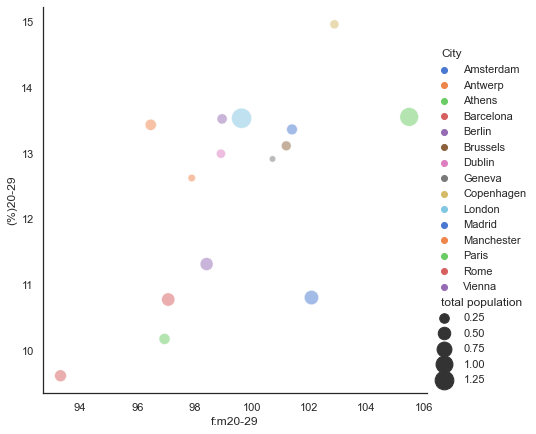

In [23]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m20-29",y='(%)20-29',hue="City", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pop_final)

### 30-39 age group

London have the most people in this age group, Athens and Rome the lowest. Most cities are clustered around 14.50%.

In term#s of population size, it seems that smaller and bigger cities have more people in the 30-39 age group, while mid size cities have less of this age group.

Cities with more males are Berlin and London, cities with more females are Paris, Athens and Barcelona.

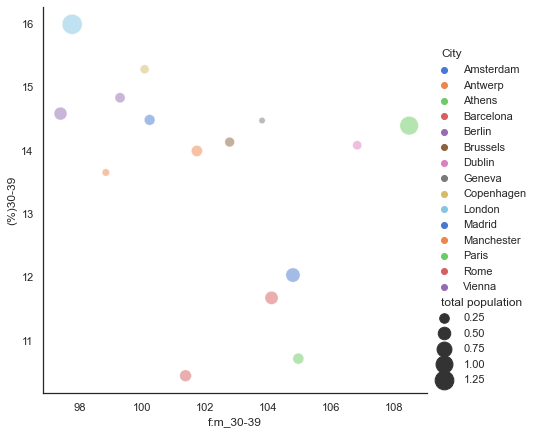

In [24]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m_30-39",y='(%)30-39',hue="City", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pop_final)

### 40-49 age group

London and Dublin have the most people in this age group. Athens and Rome have hte lowest, there is more dispersion in this age group, cities are not clustered apparently.

In terms of population size, this age group is equally dispersed across small, mid size and big cities.

Cities with more males are London and Berlin and Antwerp, cities with more females are Athens and Rome.

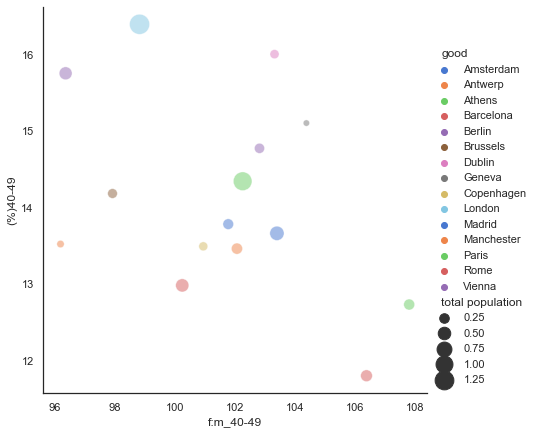

In [25]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m_40-49",y='(%)40-49',hue="good", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pop_final)

### 50-59 age group

Madrid and Barcelona have the most people in this age group. The cities with less people in this age group are Berlin, Manchester and Antwerp. The age groups seem to be clustered in two groups, above 15% and below 15%.

In terms of population size, this group is equally split across different small, mid size and big cities.

Cities with more males are Antwerp and Berlin, cities with more females are Athens and Rome.

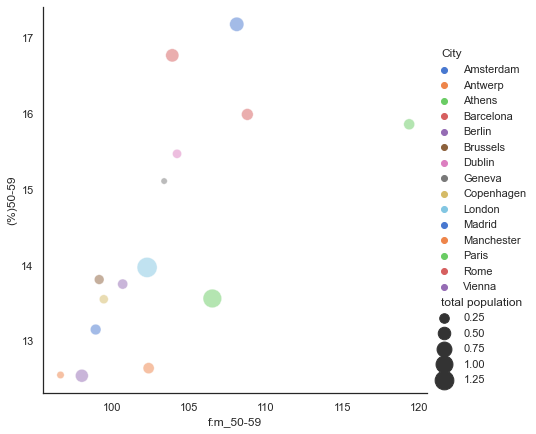

In [26]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m_50-59",y='(%)50-59',hue="City", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pop_final)

### 60-69 age group

The city with most people in this age group is Rome, Berlin and Vienna. The cities with less people of this age group are Dublin, Paris and London. Very disperse, age groups of this age are not clustered.

In terms of population size, it seems that mid size cities have the most of them, while small and big cities have less of this age group.

Cities with more males are Manchester, Amsterdam and Antwerp, cities with more females are Athens and Madrid.

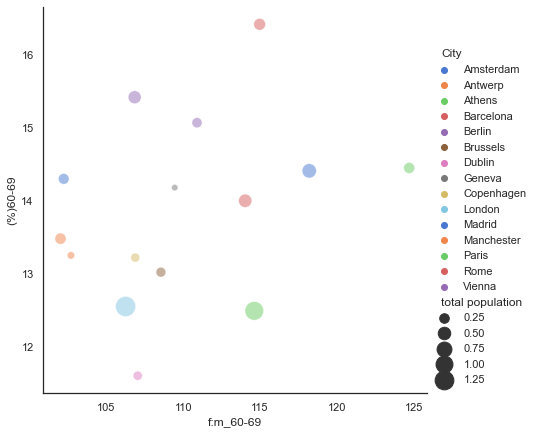

In [27]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m_60-69",y='(%)60-69',hue="City", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pop_final)

### 70-79 age group

Very similar picture, cities with more people of this age group are Rome, Athens and Vienna. Cities with smaller number of people in this age groups are Dublin, Paris and London. They are not clustered.

In terms of population size, it seems that small and big cities have less of this age group, while mid size cities have the most of them.

Cities with more males are Amsterdam, Antwerp and Dublin, cities with more female are Athens, Madrid and Geneva.

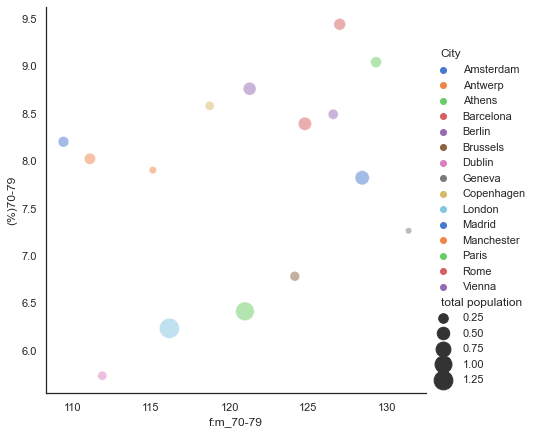

In [28]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m_70-79",y='(%)70-79',hue="City", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",height=6, data=pop_final)

### 80-89 age group

Very similar picture, cities with more people of this age group are Rome, Athens and Vienna. Cities with smaller number of people in this age groups are Dublin, Paris and London. They are not clustered.

In temrs of population size, it seems that small and big cities have the least of this age group, while mid size cities have the most of it.

Cities with more males are London, Antwerp and Dublin, cities with more females are Madrid and Brussels.

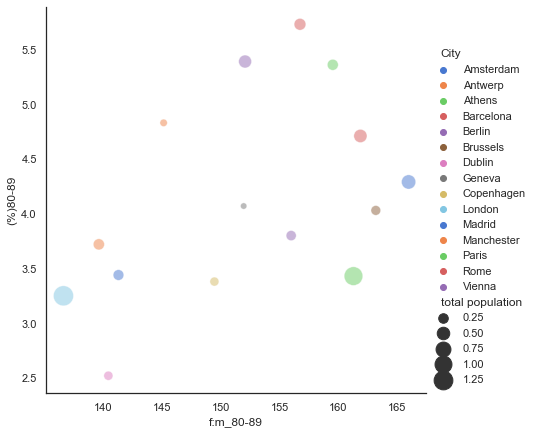

In [29]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="f:m_80-89",y='(%)80-89',hue="City", size="total population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pop_final)

## Summary

At 20-29 years old and 50-59 years old there seems to be some visible clusters, where age groups differ more than in the rest of the age groups. It seems that the differences are not very significant, which makes sense considering that the cities are all european and conformed of similar group ages.

However, there are some evidences that at some age groups have higher height on very big or very small cities, rather than mid size cities and viceversa.

There are significant differences in the amount of males and females in certain age grups in cities.

# Residences

In the following lines, we will focus on the cities from the perspective of the residences in such cities. If before the focus was on identifying differences between cities from different city spectrums, now it is about the how cities are different from the perspective of their residences characteristics, such as prices, number of bedrooms, beds, accommodates, etc.

## Definition of the typical residence in the dataset

Firt of all, we will identify the most typical residences to focus our analysis on these. The most common residences Entire homes/apartments and Private rooms within Apartments or houses, being all the rest of groups marginal in comparison.

In [30]:
df[['Property Type','Room Type']].value_counts().head(15)

Property Type    Room Type      
Apartment        Entire home/apt    141464
                 Private room        55960
House            Private room        11575
                 Entire home/apt      8334
Bed & Breakfast  Private room         7165
Loft             Entire home/apt      1936
Apartment        Shared room          1663
Condominium      Entire home/apt      1363
                 Private room          970
Other            Private room          736
Townhouse        Private room          492
                 Entire home/apt       475
Bed & Breakfast  Entire home/apt       465
Other            Entire home/apt       464
Boat             Entire home/apt       459
dtype: int64

Secondly, we will focus the scope on the most typical house size in terms of bedrooms. The most typical bed count in Entire homes and apartments and Private rooms is between 1 and 4. Therefore, we will visualize these subgroup in our analysis.

In [31]:
df[(df['Room Type'] == 'Entire home/apt') | (df['Room Type'] == 'Private room')][['Beds','Room Type']].value_counts().head(30)

Beds  Room Type      
1.0   Private room       63634
      Entire home/apt    63592
2.0   Entire home/apt    51302
3.0   Entire home/apt    20031
2.0   Private room       11423
4.0   Entire home/apt    11390
5.0   Entire home/apt     4445
6.0   Entire home/apt     2687
3.0   Private room        2250
4.0   Private room         933
7.0   Entire home/apt      873
8.0   Entire home/apt      642
5.0   Private room         220
9.0   Entire home/apt      218
10.0  Entire home/apt      191
6.0   Private room         108
16.0  Entire home/apt       99
12.0  Entire home/apt       92
8.0   Private room          58
11.0  Entire home/apt       56
7.0   Private room          43
14.0  Entire home/apt       43
13.0  Entire home/apt       27
16.0  Private room          25
10.0  Private room          25
9.0   Private room          21
12.0  Private room          18
15.0  Entire home/apt       13
13.0  Private room           6
14.0  Private room           6
dtype: int64

The price of copenhaguen is in Danish Corona (1 euro = 0.13 Danish Corona), therefore, we will have to modify this.

In [32]:
df['Price'] = np.where(df['City'] == 'Copenhagen', df['Price']*0.13, df['Price'])
df['Weekly Price'] = np.where(df['City'] == 'Copenhagen', df['Weekly Price']*0.13, df['Weekly Price'])
df['Monthly Price'] = np.where(df['City'] == 'Copenhagen', df['Monthly Price']*0.13, df['Monthly Price'])

The price of London is in Pounds (1 euros = 0.86 pounds)

In [33]:
df['Price'] = np.where(df['City'] == 'London', df['Price']/0.86, df['Price'])
df['Weekly Price'] = np.where(df['City'] == 'London', df['Weekly Price']/0.86, df['Weekly Price'])
df['Monthly Price'] = np.where(df['City'] == 'London', df['Monthly Price']/0.86, df['Monthly Price'])

In [34]:
checka= df[(df['Room Type'] == 'Entire home/apt') | (df['Room Type'] == 'Private room')][['City','Room Type','Bedrooms','Accommodates','Beds','Price']]

## Comparison of prices per city

### Prices for entire homes and appartments

Text(0.5, 0, 'Cities')

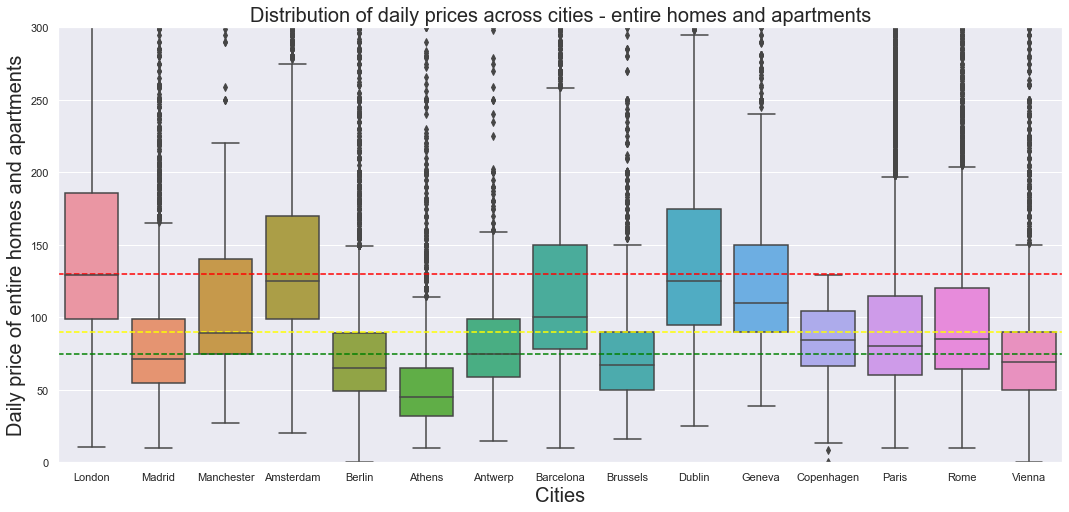

In [84]:
sns.set(rc={'figure.figsize':(18,8)})
ax = sns.boxplot(x="City", y="Price",
                 data=checka[checka['Room Type']=='Entire home/apt'])
plt.ylim(0, 300)
ax.axhline(75, ls='--', color='green')
ax.axhline(90, ls='--', color='yellow')
ax.axhline(130, ls='--', color='red')
plt.title('Distribution of daily prices across cities - entire homes and apartments', fontsize=20)
plt.ylabel('Daily price of entire homes and apartments', fontsize=20)
plt.xlabel('Cities',fontsize=20)

For **Entire homes and apartments**, we observe the following:

* Price range (size of boxes), The size of the box represents the 25th to 75th residence in terms of prices, this is, 50% of residences are in this price range. Some cities as Athens, Copenhagen, Vienna and Madrid have smaller boxes than the rest, this means that many residences have closer price ranges. On the opposite, cities such as Dublin, London, Amsterdam and Manchester have larger boxes, meaning that there is more variety in prices.


* Clusters, or similar cities in terms of price: Checking the prices composition, we could initially make 3 clusters:
  - low tier cluster (green line): *Madrid, Berlin, Athens, Brussels and Vienna*
  - mid tier cluster (yellow line): *Manchester, Barcelona, Copenhagen, Paris and Rome*
  - high tier cluster (red line): *London, Amsterdam, Dublin and Geneva*

Therefore, it could make sense that people living in each cluster would be recommended, based on their house price, a residence in a city of these groups. 

### Prices for Private rooms

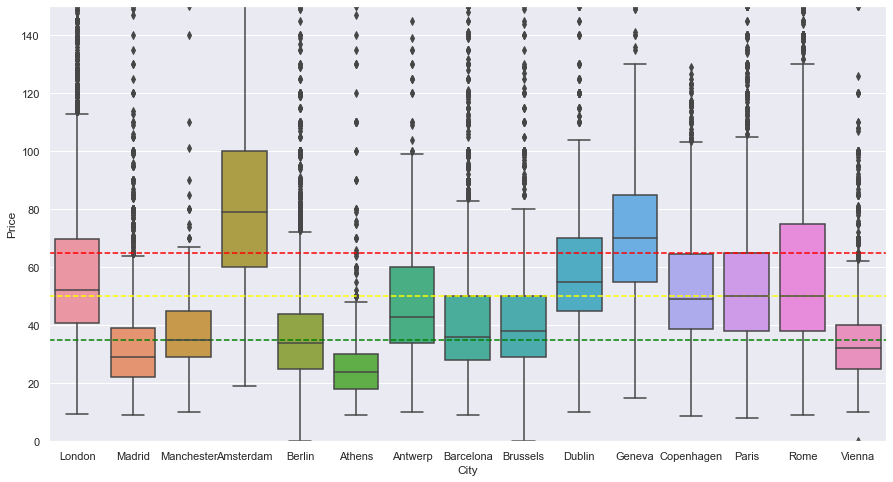

In [36]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Price",
                 data=checka[checka['Room Type']=='Private room'])
plt.ylim(0, 150)
ax.axhline(35, ls='--', color='green')
ax.axhline(50, ls='--', color='yellow')
ax.axhline(65, ls='--', color='red')

For **Private rooms**, we observe the following:

* Price range (size of boxes), The size of the box represents the 25th to 75th residence in terms of prices, this is, 50% of residences are in this price range. Some cities as Athens, Manchester, Vienna and Madrid have smaller boxes than the rest, this means that many residences have closer price ranges. On the opposite, cities such as Amsterdam and Rome have larger boxes, meaning that there is more variety in prices.


* Clusters, or similar cities in terms of price: Checking the prices composition, we could initially make 3 clusters:
  - low tier cluster (green line): *Madrid, Berlin, Athens, Brussels, Barcelona and Vienna*
  - mid tier cluster (yellow line): *London, Antwerp, Copenhagen, Paris and Rome*
  - high tier cluster (red line): *Amsterdam, Dublin and Geneva*

Therefore, it could make sense that people living in each cluster would be recommended, based on their room price, a room in a city of these groups. 

## Comparison of number of bedrooms per city

### Number of bedrooms in entire houses and apartments

(0.0, 6.0)

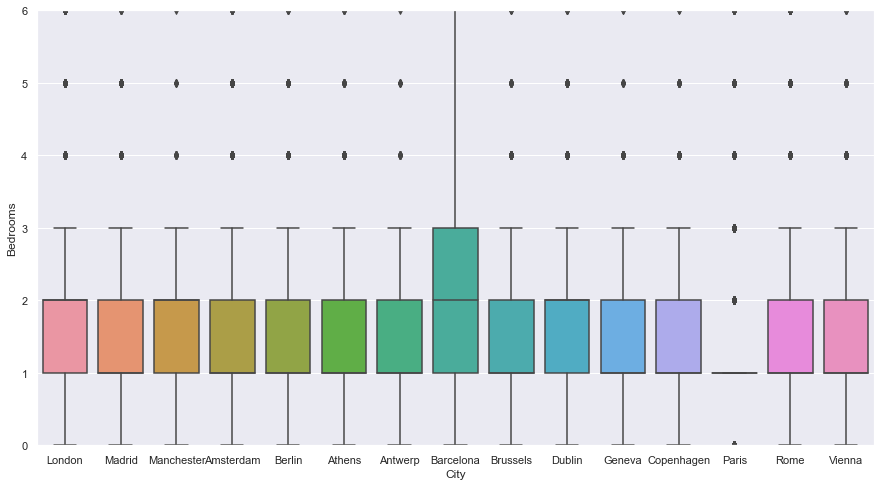

In [37]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Bedrooms",
                 data=checka[checka['Room Type']=='Entire home/apt'])
plt.ylim(0, 6)

More than 50% of the entire house and apartments have 1 or 2 bedrooms. Barcelona is an expectional case, becuase there are more houses with 3 and more bedrooms than the rest of cities. Paris is also a special case, becuase there are many more entire homes and apartments with only 1 bedroom.

### Number of bedrooms in Private rooms

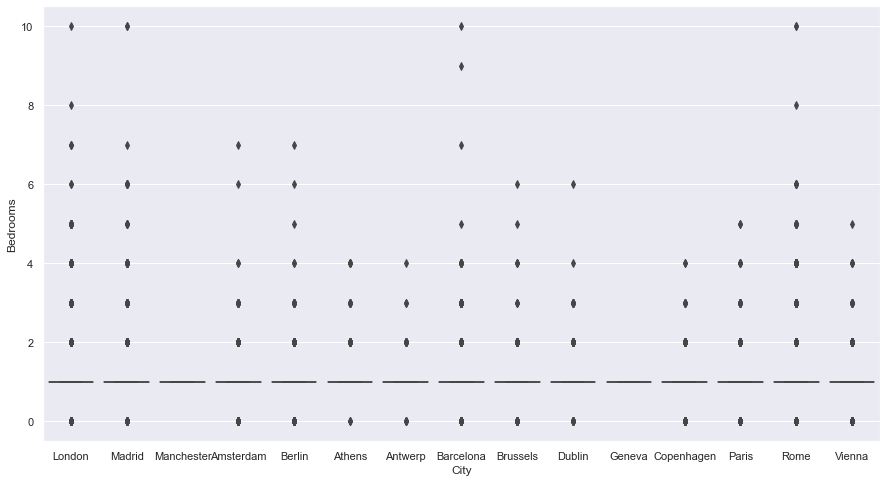

In [38]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Bedrooms",
                 data=checka[checka['Room Type']=='Private room'])

The fact that we cannot see boxes means that there must be an overwhelming majority of Private rooms in which the number of bedrooms is 1. This makes sense, as normally hosts that rent a room only publish Bedroom = 1, even if the house or apartment have more rooms.

## Number of beds per city

### Number of beds in entire houses and apartments

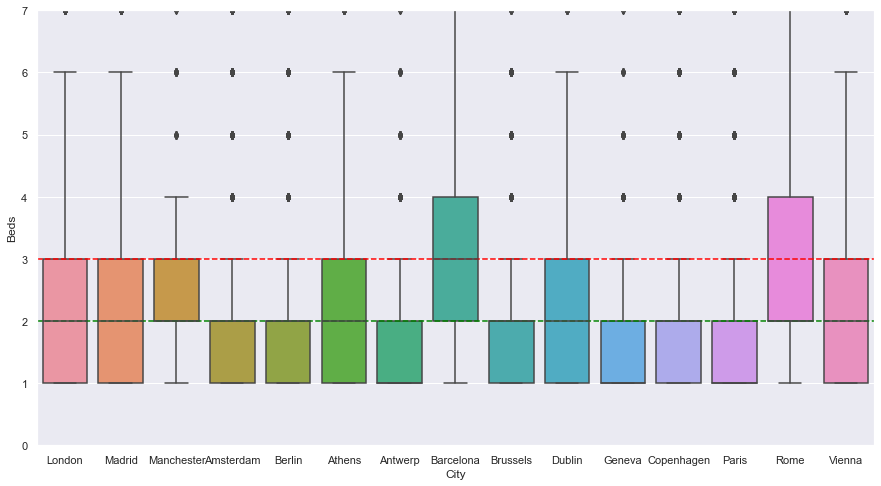

In [39]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Beds",
                 data=checka[checka['Room Type']=='Entire home/apt'])
plt.ylim(0, 7)
ax.axhline(2, ls='--', color='green')
ax.axhline(3, ls='--', color='red')

Most residences have 1 or 2 beds in the house, in some cases it is also common to have 3 beds in the house.

Antwerp and Rome include more beds than the rest of cities in entire homes and apartments. Vienna, Athens, London, Dublin and Manchester and Madrid also include up to 3 beds in the residences for 50% of the houses. Amsterdam, Berlin, Antwerp, Geneva, Copenhagen and Paris include the least amount of beds in the residences.

### Number of beds in private rooms

(0.0, 4.0)

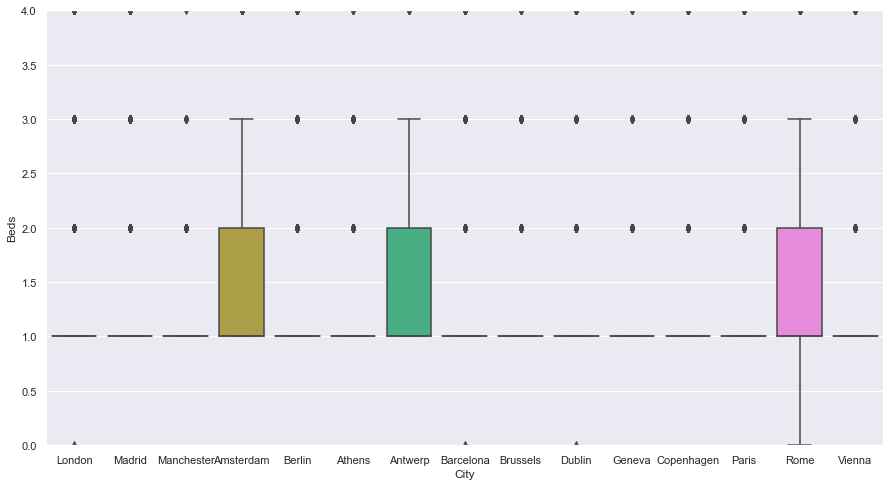

In [40]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Beds",
                 data=checka[checka['Room Type']=='Private room'])
plt.ylim(0, 4)

For private rooms the most common is having 1 bed, in cities such as Amsterdam, Antwerp and Rome it is common that they have 2 beds in more cases.

## Accomodates per city

### Number of accommodates in entire houses and apartments

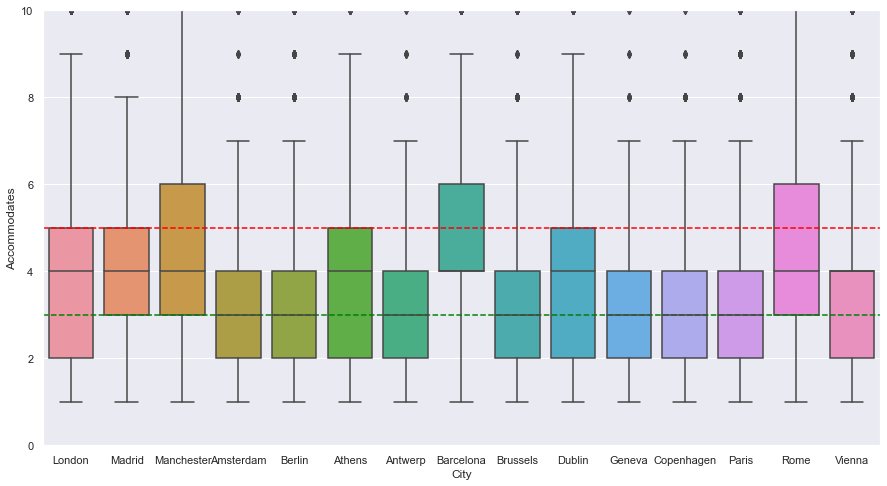

In [41]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Accommodates",
                 data=checka[checka['Room Type']=='Entire home/apt'])
plt.ylim(0,10)
ax.axhline(3, ls='--', color='green')
ax.axhline(5, ls='--', color='red')

Most cities residences allow from 2 to 4 accomodates in most cases, there are some cities such as Barcelona, Madrid, Manchester, London, Dublin and Rome where residences allow usually more accommodates.

### Number of accommodates in entire private rooms

(0.0, 5.0)

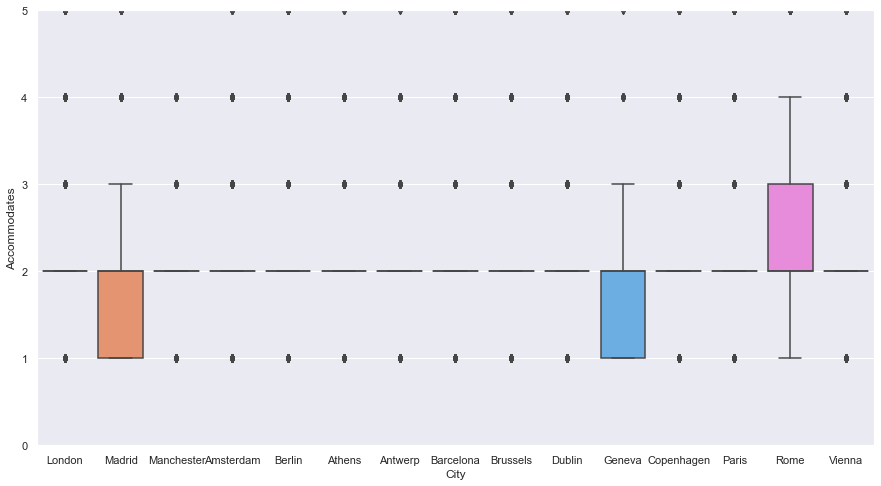

In [42]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Accommodates",
                 data=checka[checka['Room Type']=='Private room'])
plt.ylim(0,5)

In private rooms, most of the cities allow 2 accomodates. In Madrid and Geneva there is a higher number of residences that only allow 1 accomodate. In Rome there are more residences that allow 3 accommodates per Private room.

In [43]:
dfgrouped2 = df[((df['Room Type'] == 'Entire home/apt') | (df['Room Type'] == 'Private room')) & (df['Beds'].isin([1,2,3,4,5,6,7,8]))][['City','Room Type','Bedrooms','Accommodates']]
q25_residence2 = dfgrouped2.groupby(by=['City','Room Type'])[['City','Room Type','Bedrooms','Accommodates']]
check2= df[(df['Room Type'] == 'Entire home/apt') | (df['Room Type'] == 'Private room')][['City','Room Type','Bedrooms','Accommodates']]
#q37_residence2 = dfgrouped2.groupby(by=['City','Room Type'])[['City','Room Type','Bedrooms','Accommodates']]
#median_residence2 = dfgrouped2.groupby(by=['City','Room Type'])[['City','Room Type','Bedrooms','Accommodates']]
#q62_residence2 = dfgrouped2.groupby(by=['City','Room Type'])[['City','Room Type','Bedrooms','Accommodates']]
#q75_residence2 = dfgrouped2.groupby(by=['City','Room Type'])[['City','Room Type','Bedrooms','Accommodates']]
#q85_residence2 = dfgrouped2.groupby(by=['City','Room Type'])[['City','Room Type','Bedrooms','Accommodates']]

## Ratings of residences per city

Firstly, we will ignore every residence that has not a rating, this is the ones with 0 value for ratings that we imputed in the Data wrangling stage.

In [44]:
df2 = df[df['Review Scores Rating'] != 0]

### General rating of entire home and apartments per city

Text(0.5, 0, 'Cities')

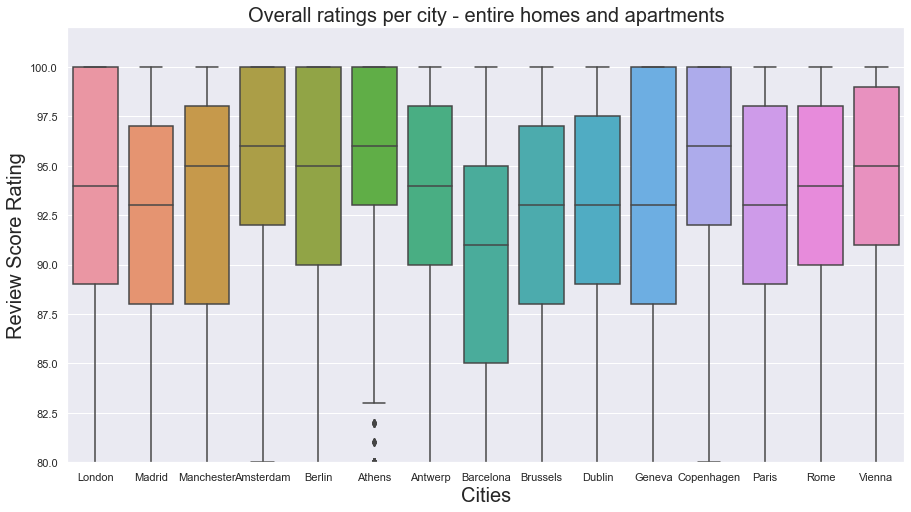

In [85]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Rating",
                 data=df2[df2['Room Type']=='Entire home/apt'])
plt.ylim(80,102)
plt.title('Overall ratings per city - entire homes and apartments', fontsize=20)
plt.ylabel('Review Score Rating', fontsize=20)
plt.xlabel('Cities', fontsize=20)

Cities with better overall ratings are Amsterdam, Athens, London and Copenhagen. City with worst overall rating is Barcelona, Madrid, Brussels and Dublin.

However, most cities have very good ratings, being more than 75% of ratings above 85%. Therefore, the ratings may not be a very good indicator of residences preferences.

### General rating of private rooms per city

(80.0, 102.0)

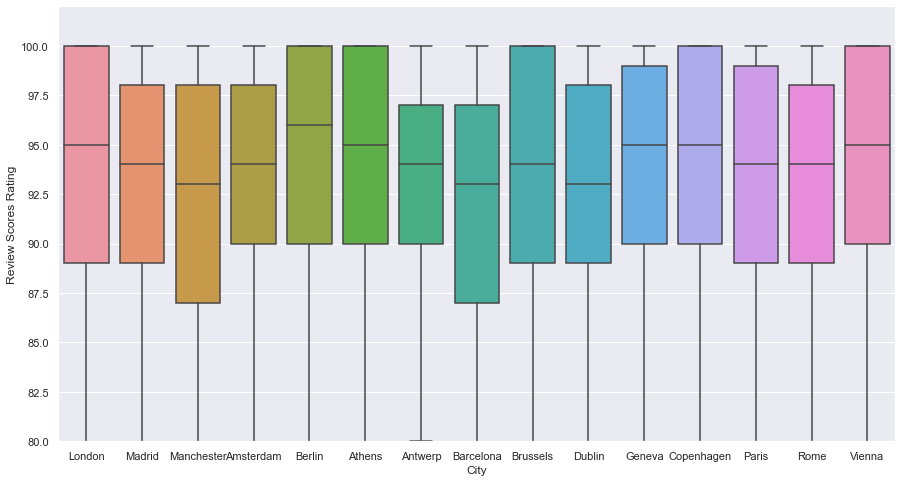

In [46]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Rating",
                 data=df2[df2['Room Type']=='Private room'])
plt.ylim(80,102)

Private rooms have very similar overall ratings. Manchester and Barcelona are the worst rated, but again, more than 75% of the ratings are above 86%, so overall ratings may not be a good indicator of the preferences for residences.

### Cleanliness rating of entire home and apartments per city

(7.0, 10.0)

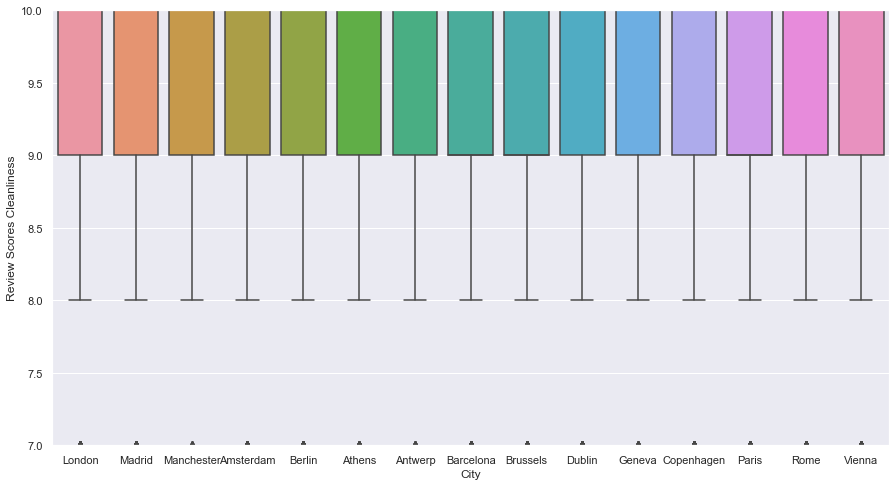

In [47]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Cleanliness",
                 data=df2[df2['Room Type']=='Entire home/apt'])
plt.ylim(7,10)

Cleanliness ratings are identical in every city, with more than 75% of ratings being above 9 out of 10, and almost 100% above 8 out of 10. It is not a good indicator of residences preference.

### Cleanliness rating of private rooms per city

(7.0, 10.0)

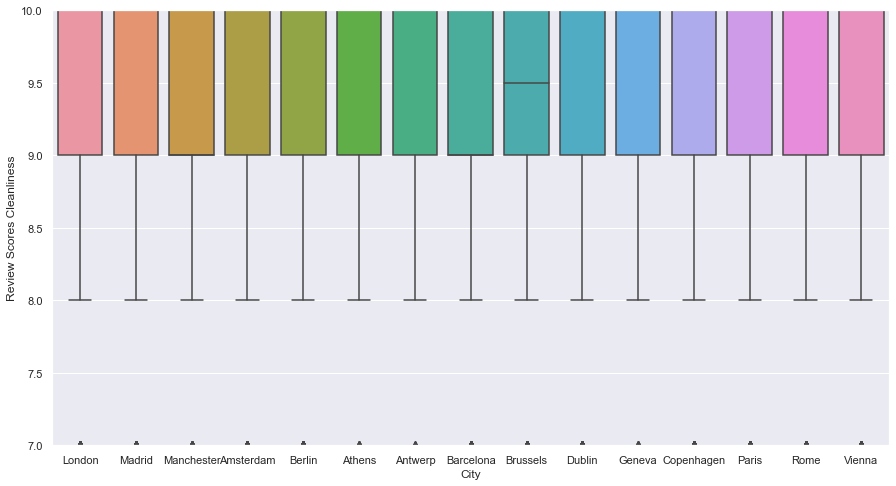

In [48]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Cleanliness",
                 data=df2[df2['Room Type']=='Private room'])
plt.ylim(7,10)

In private rooms, the cleanliness rating is the same, every city has more than 75% of ratings above 9 out of 10 and around 100% above 8 out of 10. It is not a good indicator of residences preference.

### Checkin rating of entire home and apartments per city

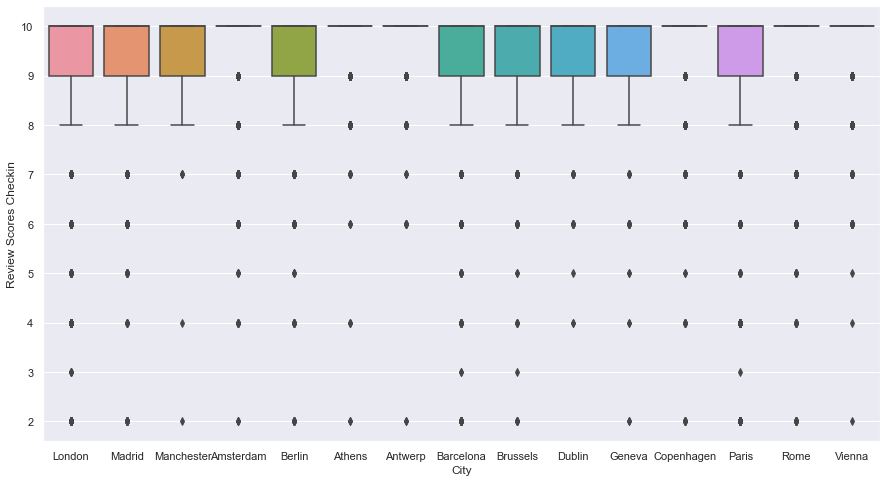

In [49]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Checkin",
                 data=df2[df2['Room Type']=='Entire home/apt'])
#plt.ylim(4,10)

There are some cities with very high checking rating for entire homes and apartments, such as Amsterdam, Athens, Antwerp, Copenhagen, Rome and Vienna. Most of them have slightly worse ratings, but they all have ratings very close to 10. In most clases more than 75% or even 100% or ratings are 9 or 10. Therefore, this rating is a not a good indicator of residence preference.

### Checkin rating of private rooms per city

(7.0, 10.0)

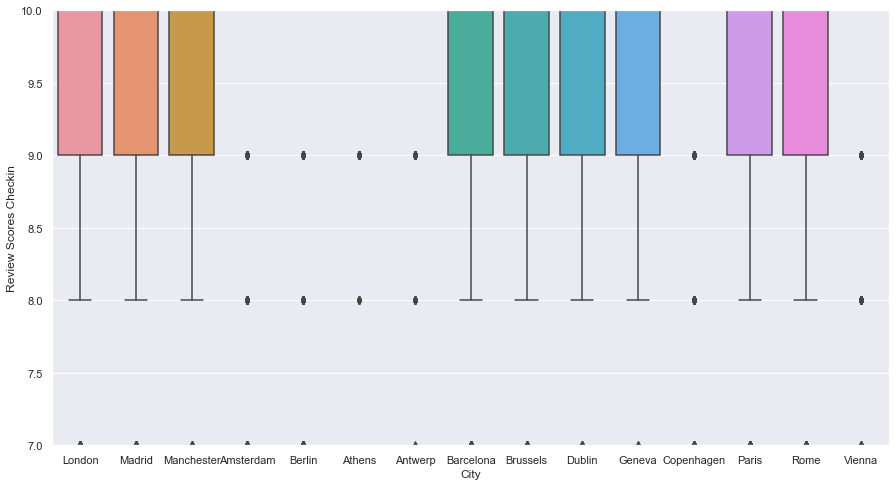

In [50]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Checkin",
                 data=df2[df2['Room Type']=='Private room'])
plt.ylim(7,10)

Checkin rating on private rooms is also very similar, some cities have slightly better ratings such as Amsterdam, Berlin, Athens, Antwerp, Copenhagen and Vienna. However, most cities have ratins of 9 out of 10 for more than 75% of the residences, or above 8 out of 10 for around 100% of the residences. Therefore, it is not a good metric to recommend residences.

### Communication rating of entire home and apartments per city

(7.0, 10.0)

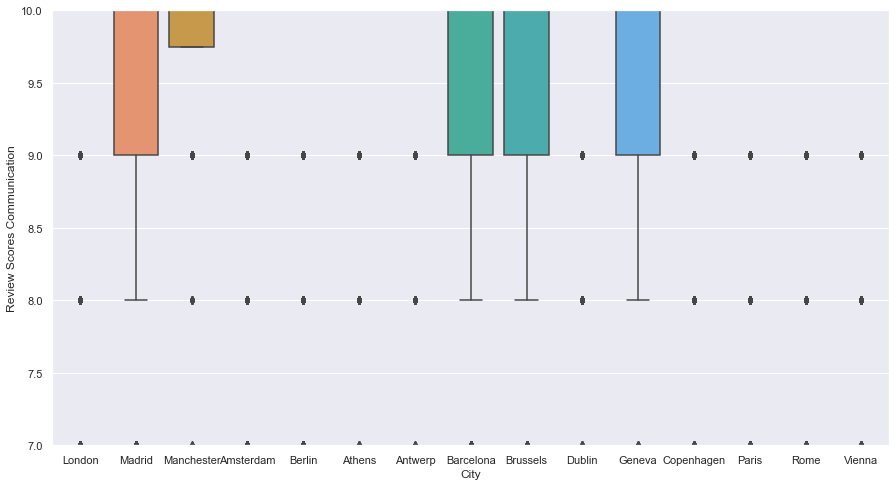

In [51]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Communication",
                 data=df2[df2['Room Type']=='Entire home/apt'])
plt.ylim(7,10)

Most cities have communication ratings of 10 out of 10 for almost 100% of the hosts, with the exception of Madrid, Barcelona, Brussels and Geneva, that have 75% of the residences above 9 out of 10. It is not a good indicator to recommend residences, as they are very alike in every city.

### Communication rating of private rooms per city

(7.0, 10.0)

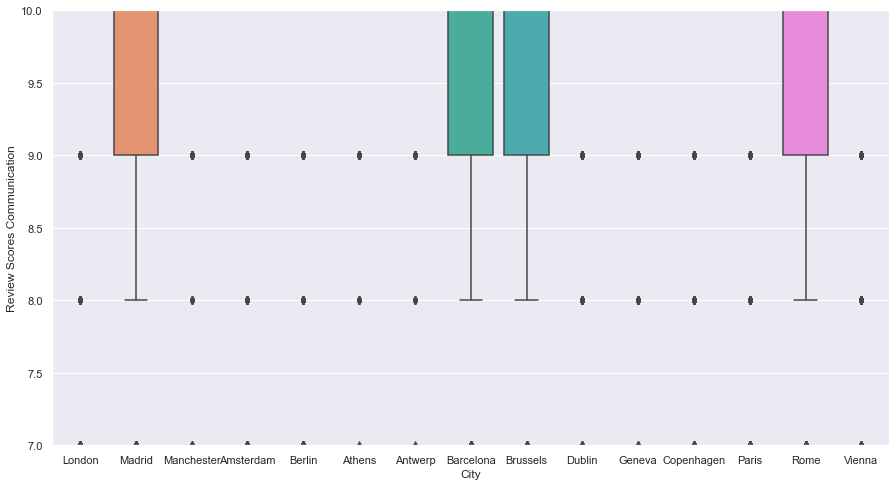

In [52]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Communication",
                 data=df2[df2['Room Type']=='Private room'])
plt.ylim(7,10)

For private rooms, the communication rating is also excellent for most cities, with the exception of Madrid, Barcelona, Brussels and Rome, which have slightly worse ratings. However, they are all very similar, so it is not a good metric to recommend residences.

### Location rating of entire home and apartments per city

(7.0, 10.0)

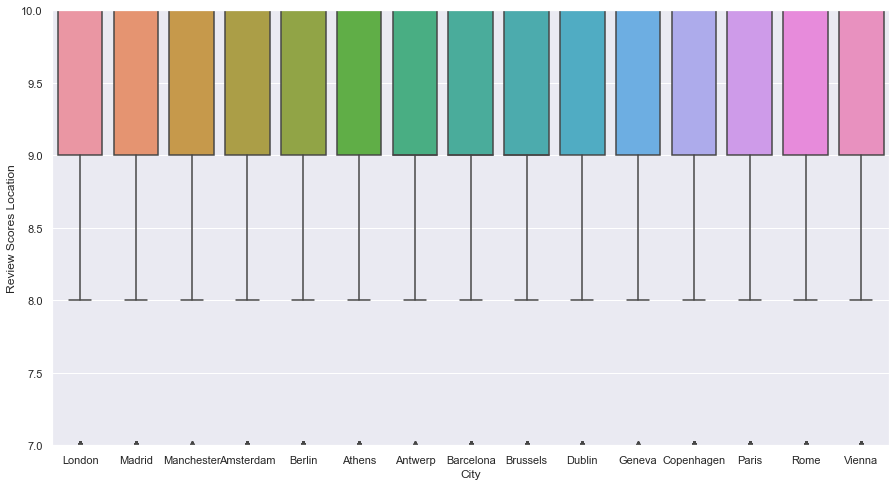

In [53]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Location",
                 data=df2[df2['Room Type']=='Entire home/apt'])
plt.ylim(7,10)

For location, all cities look very alike, with ratings of 9 out of 10 for more than 75% of resiedences and 8 out of 10 for around 100% of residences. It is not a good metric to make recommendations for being so similar in every city.

### Location rating of private rooms per city

(7.0, 10.0)

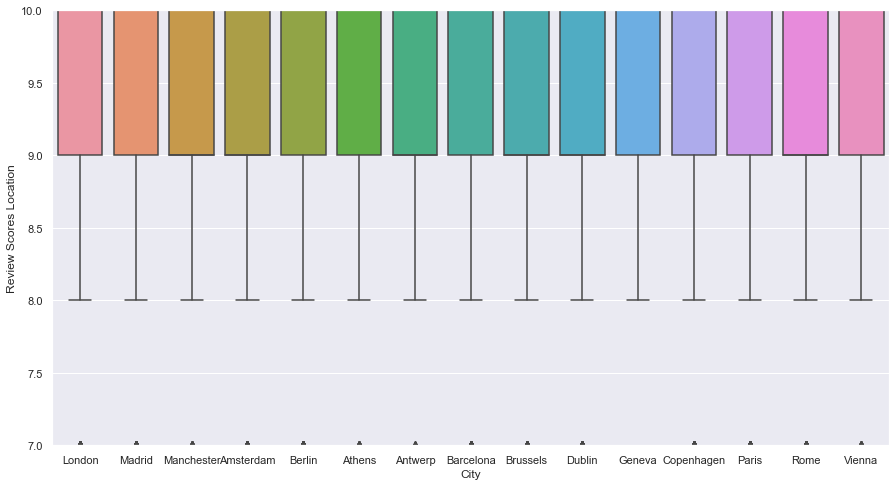

In [54]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="City", y="Review Scores Location",
                 data=df2[df2['Room Type']=='Private room'])
plt.ylim(7,10)

In private rooms, the location rating is the same for every city, making it not a good metric to make recommendations, as they are very similar for every residence.

# Summary of the work and conclussions

In the EDA we wanted to better understand both cities features and residences features in order to understand what type of features would be input in the recommender system. We explored the data and reached interesting insights in relation with both types of features.

## Summary about the city features

In relation with city features, we analyzed cities from different perspectives, economically, through its cost of living and local purchasing power, between others. Socially and Culturally, through how different individuals would enjoy or not living in that city, according to locals perceptions. Environmentally, through its air pollution, noise levels and cleanliness, as perceived by locals; or in terms of their population size, age groups and male to female ratios, to understand the population composition of each city.

* Every metric analyzed split in some way the cities between 2 or more groups. We will leverage on these metrics, per city, to make recommendations to users. In particular, we will apply city features as a first layer of recommendation, so that hosts cities are considered first in relation with future recommendations.

* Therefore, cities will be the first way of recommending residences, hosts will be first recommended cities in our recommender system that are similar to theirs, and secondly, we will consider residences features to make recommendations, on the pre-recommended subset of cities recommended by the algorithm.

## Summary about the residences features

In relation with city features, we analyzed the price of the most common residences in each city (entire homes and apartments and private rooms), its number of beds, bedrooms, accomodates, as well as the ratings given to the residences.

* In relation with the price, we observed several differences between cities, and could visualize up to 3 different clusters of cities, depending on their residence prices.

* In relation with the number of beds, bedrooms and accommodate, we observed that values were more or less similar, but intuitively there are 2 clusters of cities, ones with more beds, bedrooms and accommodates, and others with less. However, as values are integers, and most common values are 1 or 2 for beds, 1 to 4 for accommodates, or 1 for bedrooms, these clusters are going to be less split than with other metrics. In any case, it is useful to make further recommendations, ones the cities have been recommended based on city features in the step above.

In conclussion, our findings are that **city features are better clustering features for the cites**, and that **residences features are not so good for clustering or recommending (with the exception of price, which is very different from city to city)**. Ratings, numbers of beds, numbers of bedrooms and so on are not good metrics to make recommendations because they are very similar between cities, with most values being 1 or 2 (for beds and bedrooms) and 2 to 4 for accommodates. In relation with ratings, overall rating is a bit more distributed, (between 85-100), but most residences have very high ratings, so it is a weak feature to cluster residences.

In the preprocessing, we will work with the city features first to cluster, and with the residences features afterwards to filter residences within the cities recommended in the previous step.